# Windowed Scalogram

This is from the new package still being developed called wavScalogram. It is an R package for time series analysis using the Wavelet Scalogram see the github [link](https://github.com/rbensua/wavScalogram) for more details. 

In [3]:
# R package which includes Quantitative Financial Modelling Frameworks.
#https://www.rdocumentation.org/packages/quantmod
#install.packages("quantmod")
require(quantmod)

# An R Package of time series tools and utilities; Rmetrics - Financial Time Series Objects
#https://www.rdocumentation.org/packages/timeSeries
#install.packages("timeSeries")
require(timeSeries)

# devtools: Tools to Make Developing R Packages Easier 
#https://www.rdocumentation.org/packages/devtools
#install.packages("devtools")
require(devtools) # using devtools to download from github 

# R package for time series analysis using the Wavelet Scalogram 
# from https://github.com/rbensua/wavScalogram
#install_github("rbensua/wavScalogram")
require(wavScalogram)

In [5]:
# Identify the tickers of interest
tickers <- c("CGW","XLE")

# Download these tickers from Yahoo for the dates in the presentation
getSymbols(tickers,src="yahoo", from = "2007-06-01",to = "2018-01-26")
# Merge all the Price series into one dataframe
AllPrices <- do.call(merge, lapply(tickers, function(x) get(x)))

#Some of these series have (NA) missing values for dates when others 
# do not have missiong vaulesin the series so we interpolate for these values
AllPrices$CGW.Close <- interpNA(AllPrices$CGW.Close)
AllPrices$XLE.Close <- interpNA(AllPrices$XLE.Close)

#Set up the correct data frame
rCGW <- as.data.frame((AllPrices$CGW.Close))
rXLE <- as.data.frame((AllPrices$XLE.Close))

#Retrieve specific dates
date1 <- index(AllPrices)

#save Prices in Matrix
rW <- cbind(1:(length(AllPrices$CGW.Close)), rCGW$CGW.Close[1: length(AllPrices$CGW.Close)])
rE <- cbind(1:(length(AllPrices$XLE.Close)), rXLE$XLE.Close[1: length(AllPrices$XLE.Close)])


[1] "CGW" "XLE"

Loading required package: abind
Loading required package: Matrix


[1] "Montecarlo..."


Loading required package: parallel


[1] "Computing significance contours..."


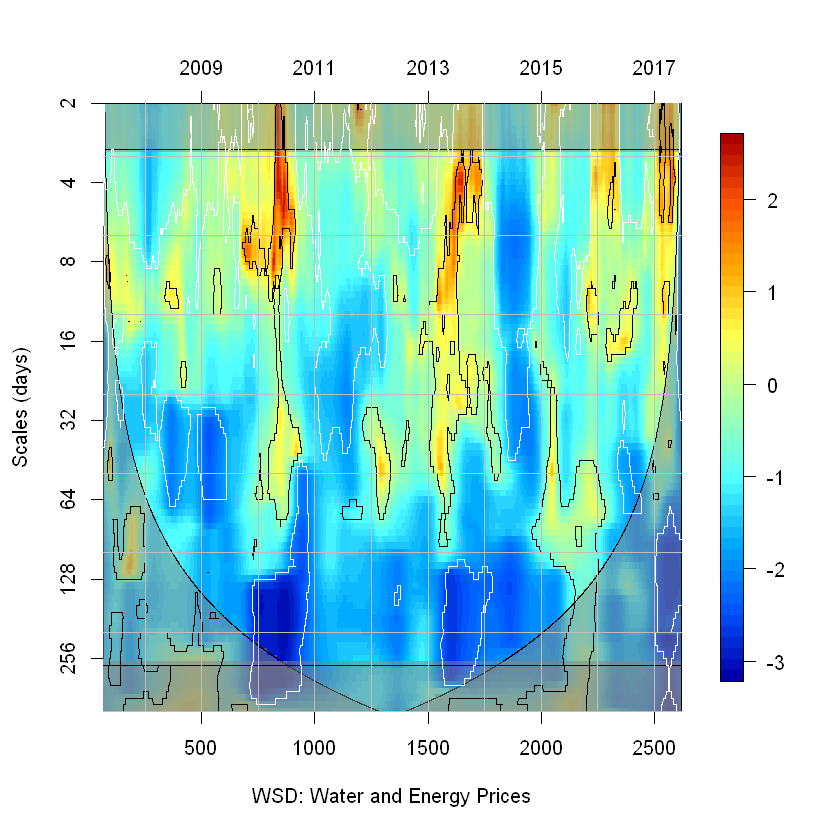

In [6]:
# This function computes the Windowed Scalogram Difference of two signals. 
# The definition and details can be found in (Bolós et al. 2017).

# For help on the exact arguments of this function see:
?wsd

# wname: A string, equal to "MORLET", "DOG", "PAUL", "HAAR" or "HAAR2". 
# The difference between "HAAR" and "HAAR2" is that "HAAR2" is more accurate but slower.
wname <- "MORLET"

#delta_t: Numeric. Increment of time for the construction of windows central times.
delta_t <- 1

nt <- length(rW)/2 # number of time points
t <- 1:nt # time vector

# mc_nrand: Integer. Number of Montecarlo simulations to be performed 
# in order to determine the 95% and 5% significance contours.
mc_nrand <- 10  # MonteCarlo repetitions (for significance contours)

#windowrad: Numeric. Time radius for the windows
windowrad <- 64 #floor(nt/60); # % time radius for windowed scalogram (width)

#rdist: Numeric. Log-scale radius for the windows measured in suboctaves.
rdist <- floor(nt/300); # % Scale radius for distance (height)

# Defining the scales (Torrence and Compo's way)
# scaleparam: A vector of three elements with the minimum scale, 
# the maximum scale and the number of suboctaves per octave for constructing power 2 scales 
# (following Torrence and Compo 1998), measured in units of time.

dt <- 1; s0 <- 2*dt; Dj <- 12
waverad <- 3 # Morlet wavelet radius
smax <- (nt-1-2*windowrad)/(2*waverad)
scales <- c(s0, smax, Dj)

#signal1: A vector containing the first signal.
#signal2: A vector containing the second signal (its length should be equal to that of signal1)

#parallel: Logical. If TRUE (default) uses function parApply from package parallel for the Montecarlo simulations. 
# When FALSE is uses the normal apply function

#border_effects: String, equal to "BE", "INNER", "PER" or "SYM", which indicates how to manage the border effects 
# which arise usually when a convolution is performed on finite-lenght signals.
# "PER": With border effects, using boundary wavelets (periodization of the original time series).

wsd <- wsd(signal1 = rW[,2], signal2 = rE[,2], scaleparam = scales, delta_t = delta_t, 
           windowrad = windowrad, rdist = rdist, mc_nrand = mc_nrand, wname = wname, 
           parallel = TRUE, makefigure = FALSE, normalize = "TRUE")

#Plotting the Windowed Scalogram Difference
#?wavPlot
wavPlot(Z = -log2(wsd$wsd), X = wsd$t, Y = wsd$scales, Ylog = TRUE, coi = wsd$coi, 
        rdist = wsd$rdist, sig95 = wsd$signif95, sig05 = wsd$signif05, Xname = "WSD: Water and Energy Prices", 
        Yname ="Scales (days)", Zname = " ")
#Adding in the dates for each of these 2 year spans (250 x 2)
axis(3, at =  c(0,500, 1000, 1500, 2000, 2500),labels=c("2007", "2009", "2011", "2013","2015", "2017"))

#Add annual lines and lines to distinguish between investment horizons
n = length(rW[, 1])
abline(v = seq(250, n, 250), h = 1:16, col = "grey", lty = 1, lwd = 1)

# References:

R Core Team (2018). R: A language and environment for statistical computing. R Foundation for Statistical Computing, Vienna, Austria. URL https://www.R-project.org/.

Diethelm Wuertz, Tobias Setz and Yohan Chalabi (2017). timeSeries: Rmetrics - Financial Time Series Objects. R package version 3042.102. https://CRAN.R-project.org/package=timeSeries

Jeffrey A. Ryan and Joshua M. Ulrich (2018). quantmod: Quantitative Financial Modelling Framework. R package version 0.4-13. https://CRAN.R-project.org/package=quantmod

Hadley Wickham, Jim Hester and Winston Chang (2018). devtools: Tools to Make Developing R Packages Easier. R package version 1.13.5. https://CRAN.R-project.org/package=devtools

C. Torrence, G. P. Compo. A practical guide to wavelet analysis. B. Am. Meteorol. Soc. 79 (1998), 61–78.

V. J. Bolós, R. Benítez, R. Ferrer, R. Jammazi. The windowed scalogram difference: a novel wavelet tool for comparing time series. Appl. Math. Comput., 312 (2017), 49-65.